In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
def plotBars(df,field, fieldID, sort=True, topN=0):
    a = len(df[fieldID].unique())
    print('***Restaurant count:', a)
    res = (df[[fieldID,field]]
           .groupby(field)
           .count())
    if sort==True: res = res.sort_values(fieldID, ascending=False)
    if topN>0: res = res.head(topN) 
    res.plot.bar(figsize=(16,5))
    y = res[fieldID]
    for i, v in enumerate(y):
        plt.text(i-.1, v+7 , str(v), fontweight='bold')
    m = res.mean() 
    plt.plot([-1,i+1],[m,m],color='red')
    plt.legend(['Mean','Count'])
    plt.title(field)
    plt.show()
    
def dateTrans(cad):
    cad = cad.split('-')
    li = dt.datetime.strptime(cad[0],'%H:%M')
    cad = cad[1].split(';')[0]
    ls = dt.datetime.strptime(cad,'%H:%M')
    return np.array([li,ls])

def getDateDummies(daux):
    dateaRange = pd.date_range(start='1/1/1900', periods=48, freq='30min')
    bux = dateaRange
    cux = daux[0] <= bux 
    cux = cux*(bux <= daux[1])*1
    return cux

def getNomDummies(df,field):
    dm = pd.get_dummies(df[field])
    df = pd.concat([df, dm], axis=1)
    return df
    
def getFreqDummies(df,fieldID, field, n, cat=None, flag=0):
    #Frequency dummy variable
    if flag==0: 
        cat = df[[fieldID,field]].groupby(field).count()/n
    return df[field].apply(lambda x: cat.loc[x]), cat

def transCusine(df):
    df.loc[df.Rcuisine=='Spanish', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Italian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Armenian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Polish', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Dutch-Belgian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='French', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='German', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Continental-European', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Greek', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Eastern_European', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Romanian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='British', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Russian-Ukrainian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Irish', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Swiss', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Hungarian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Scandinavian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Pacific_Rim', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Portuguese', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='American', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Southwestern', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Southern', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='California', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Hawaiian', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Canadian', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Pacific_Northwest', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Tex-Mex', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Latin_American', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Mexican', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Brazilian', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Caribbean', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Chilean', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Cuban', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Jamaican', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Asian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Mongolian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Japanese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Sushi', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Chinese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Mediterranean', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Afghan', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Vietnamese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Korean', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Thai', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Persian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Turkish', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Australian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Austrian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Israeli', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Malaysian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Peruvian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Cambodian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Tunisian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Filipino', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Indigenous', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Indonesian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Tibetan', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Southeast_Asian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Indian-Pakistani', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Polynesian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Middle_Eastern', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Burmese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Lebanese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='African', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='Ethiopian', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='North_African', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='Moroccan', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='Fast_Food', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Burgers', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Deli-Sandwiches', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Pizzeria', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Bagels', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Dessert-Ice_Cream', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Hot_Dogs', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Bakery', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Barbecue', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Doughnuts', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Soup', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Regional', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Seafood', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Steaks', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Tea_House', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Tapas', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Eclectic', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Fusion', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Basque', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Dim_Sum', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Cajun-Creole', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Kosher', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='International', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Contemporary', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Fine_Dining', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Diner', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Breakfast-Brunch', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Family', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Game', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Vegetarian', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Organic-Healthy', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Juice', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Bar', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Bar_Pub_Brewery', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Cafe-Coffee_Shop', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Cafeteria', 'Rcuisine'] = 'DRINK'

In [3]:
ratings = pd.read_csv('3_Ratings.csv')
users = pd.read_csv('2_user_perfil.csv')
restaurants = pd.read_csv('1_rest5_perfil.csv')

### Payments:

In [4]:
resPay = pd.read_csv('1_rest1_pagos.csv')
nrpy = len(resPay)

***Restaurant count: 615


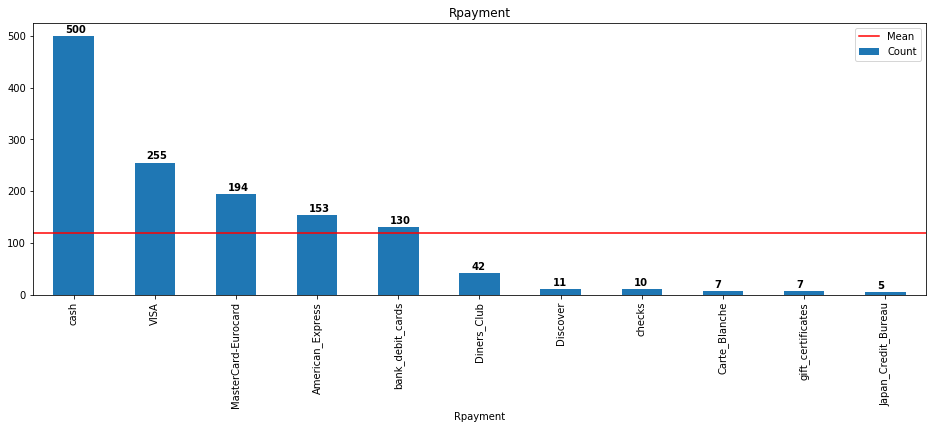

In [5]:
# Clean data
resPay.loc[resPay.Rpayment=='Visa', 'Rpayment'] = 'VISA'   
plotBars(resPay,'Rpayment','placeID')  
#Frequency nominal variable
resPay = getNomDummies(resPay,'Rpayment')
resPay = resPay.groupby('placeID').sum().reset_index(level='placeID')

In [6]:
#Info
resPay.info()
resPay.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
placeID                615 non-null int64
American_Express       615 non-null uint8
Carte_Blanche          615 non-null uint8
Diners_Club            615 non-null uint8
Discover               615 non-null uint8
Japan_Credit_Bureau    615 non-null uint8
MasterCard-Eurocard    615 non-null uint8
VISA                   615 non-null uint8
bank_debit_cards       615 non-null uint8
cash                   615 non-null uint8
checks                 615 non-null uint8
gift_certificates      615 non-null uint8
dtypes: int64(1), uint8(11)
memory usage: 11.5 KB


,placeID,American_Express,Carte_Blanche,Diners_Club,Discover,Japan_Credit_Bureau,MasterCard-Eurocard,VISA,bank_debit_cards,cash,checks,gift_certificates
0,132002,1,0,1,0,0,1,1,0,0,0,0
1,132012,1,0,1,0,0,0,1,1,0,0,0
2,132019,1,0,1,0,0,1,1,0,0,0,0
3,132023,1,0,1,0,1,0,0,1,0,0,0
4,132024,1,0,1,0,0,0,1,1,0,0,0


### kitchen

In [7]:
resKit = pd.read_csv('1_rest2_cocina.csv')
nrk = len(resKit)

***Restaurant count: 769


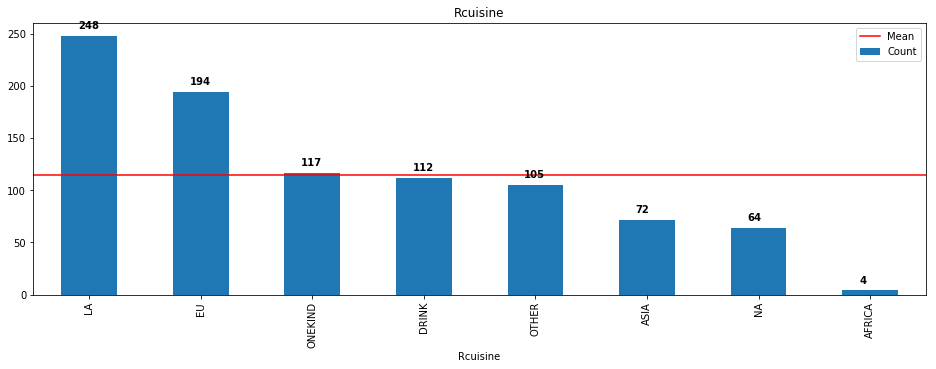

In [8]:
# Clean data
transCusine(resKit) 
plotBars(resKit,'Rcuisine','placeID')  
#Frequency nominal variable
resKit = getNomDummies(resKit,'Rcuisine')
resKit = resKit.groupby('placeID').sum().reset_index(level='placeID')

In [9]:
resKit.info()
resKit.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
placeID    769 non-null int64
AFRICA     769 non-null uint8
ASIA       769 non-null uint8
DRINK      769 non-null uint8
EU         769 non-null uint8
LA         769 non-null uint8
NA         769 non-null uint8
ONEKIND    769 non-null uint8
OTHER      769 non-null uint8
dtypes: int64(1), uint8(8)
memory usage: 12.1 KB


,placeID,AFRICA,ASIA,DRINK,EU,LA,NA,ONEKIND,OTHER
0,132001,0,0,0,1,0,0,0,0
1,132002,0,0,0,0,0,0,1,0
2,132003,0,0,0,0,0,0,0,1


### Shedule      
*   **pendient**

In [10]:
resSh = pd.read_csv('1_rest3_horario.csv')
nrs = len(resSh)
resSh.info()
resSh.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;


In [11]:
a = resSh['hours'].unique()
print('Shedules:',len(a))

Shedules: 273


In [12]:
dates_list = [dateTrans(date) for date in resSh['hours']]

resShTime = pd.DataFrame()
for col in range(0,48):
    resShTime[col] = ''
for i in range(0,nrs):
    resShTime.loc[i] = getDateDummies(dates_list[i])
    
originalArr = resSh['days']
originalArr = originalArr
resShTime = pd.concat([originalArr, resShTime], axis=1)
res = resShTime.groupby('days').sum().copy()

***Restaurant count: 694


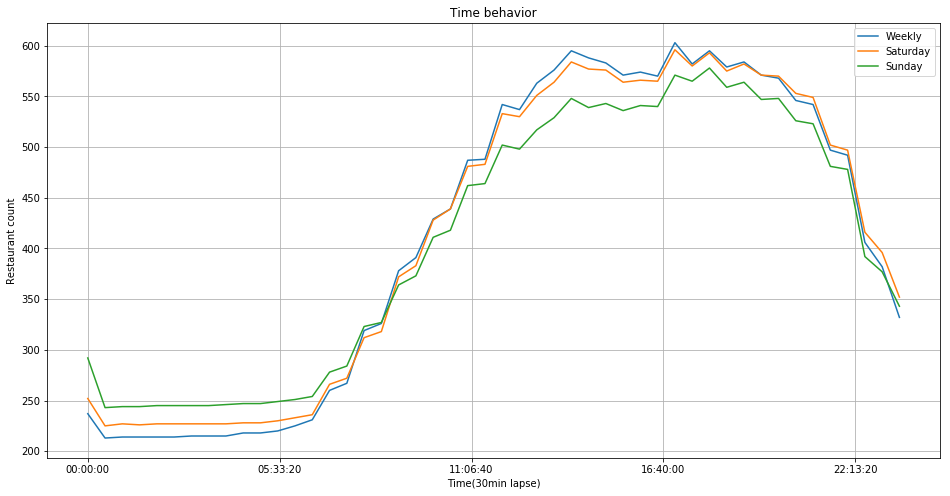

In [13]:
a = len(resSh['placeID'].unique())
print('***Restaurant count:', a)

plt.figure(figsize=(16,8))
tms = pd.date_range(start='1/1/1900', periods=48, freq='30min').time
plt.plot(tms, res.iloc[0])
plt.plot(tms, res.iloc[1])
plt.plot(tms, res.iloc[2])
plt.legend(['Weekly','Saturday','Sunday'])
plt.xlabel('Time(30min lapse)')
plt.ylabel('Restaurant count')
plt.title('Time behavior')
plt.grid(True)
plt.show()

### Parking

In [14]:
resPk = pd.read_csv('1_rest4_estacionamiento.csv')
nrpk = len(resPk)

In [15]:
resPk.loc[resPk.parking_lot == 'public',  'parking_lot'] = 1
resPk.loc[resPk.parking_lot == 'none',  'parking_lot'] = 0
resPk.loc[resPk.parking_lot == 'yes',  'parking_lot'] = 1
resPk.loc[resPk.parking_lot == 'valet parking',  'parking_lot'] = 1
resPk.loc[resPk.parking_lot == 'fee',  'parking_lot'] = 1
resPk.loc[resPk.parking_lot == 'street',  'parking_lot'] = 0
resPk.loc[resPk.parking_lot == 'validated parking',  'parking_lot'] = 0
resPk['parking_lot'] = resPk['parking_lot'].astype(int)

***Restaurant count: 675


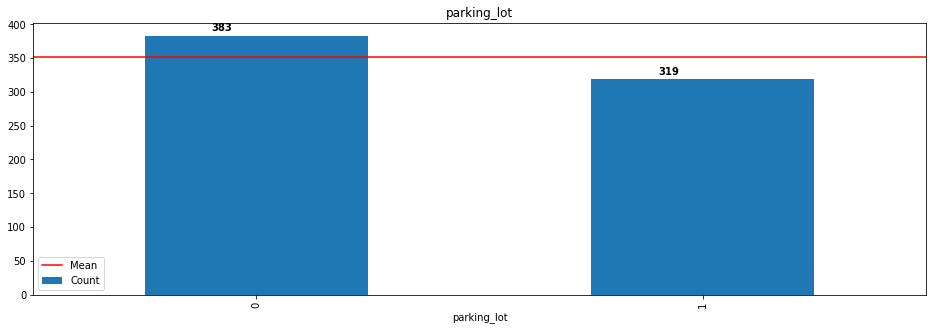

In [16]:
plotBars(resPk,'parking_lot','placeID')  
#Frequency nominal variable
#resPk = getNomDummies(resPk,'parking_lot')
resPk = resPk.groupby('placeID').sum().reset_index(level='placeID')

In [17]:
resPk.info()
resPk.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
placeID        675 non-null int64
parking_lot    675 non-null int64
dtypes: int64(2)
memory usage: 10.6 KB


,placeID,parking_lot
0,132012,1
1,132023,2
2,132024,0


### Profile

In [18]:
resPf = pd.read_csv('1_rest5_perfil.csv')
nrpf = len(resPf)

***Restaurant count: 130


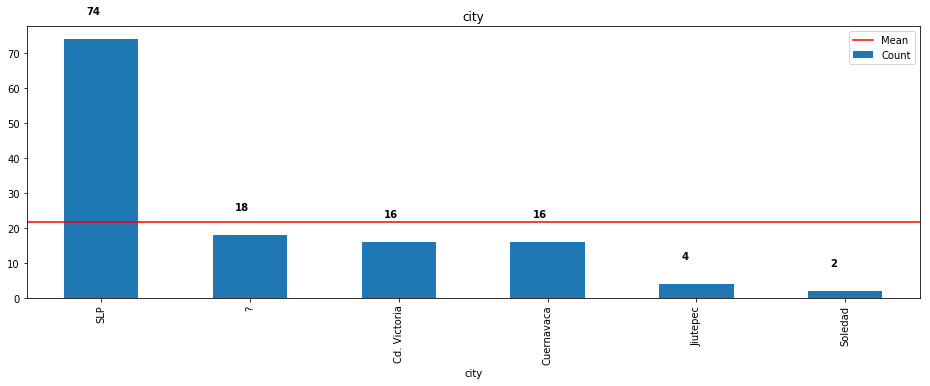

***Restaurant count: 130


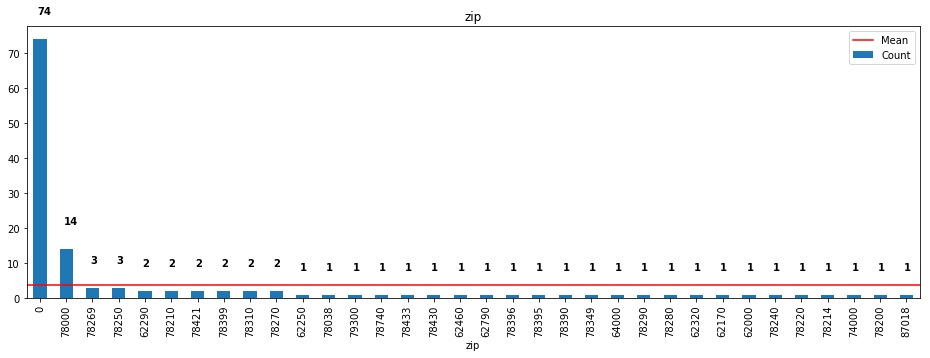

***Restaurant count: 130


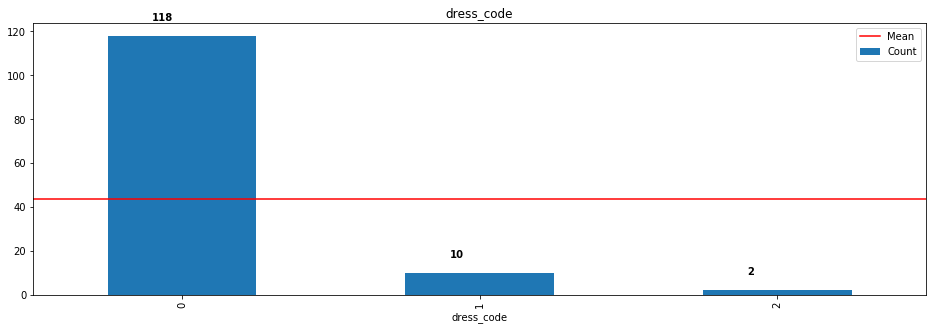

***Restaurant count: 130


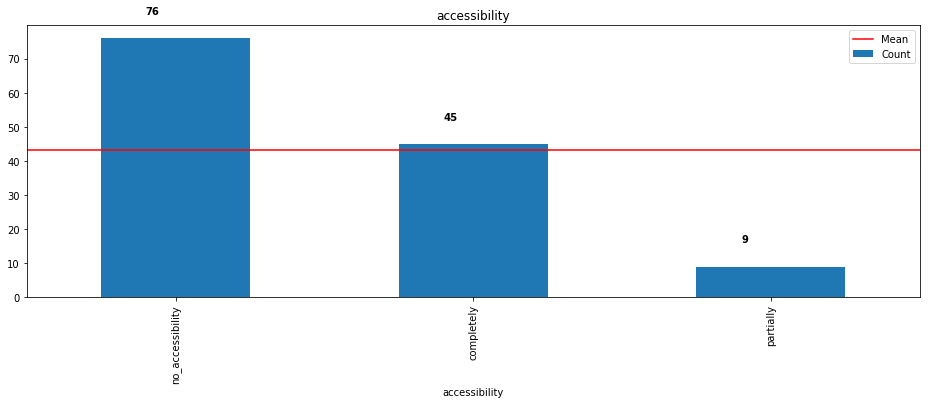

***Restaurant count: 130


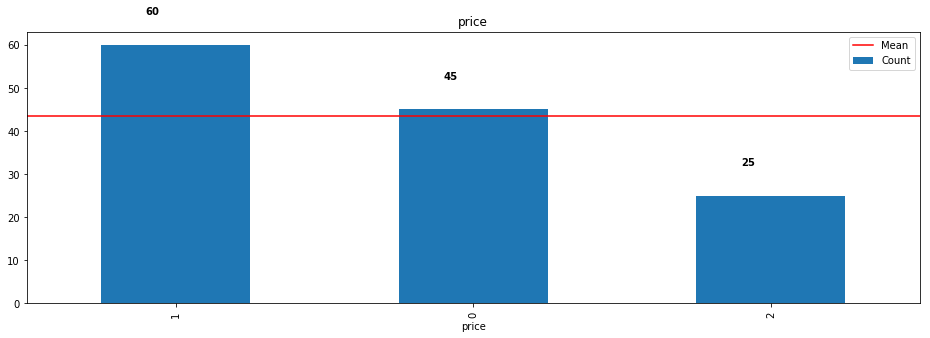

***Restaurant count: 130


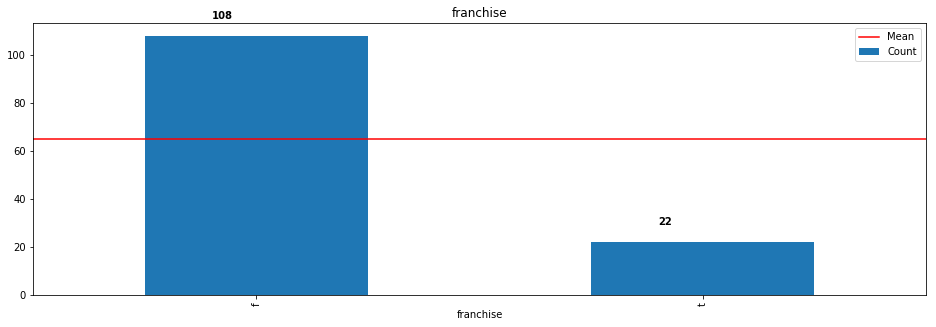

***Restaurant count: 130


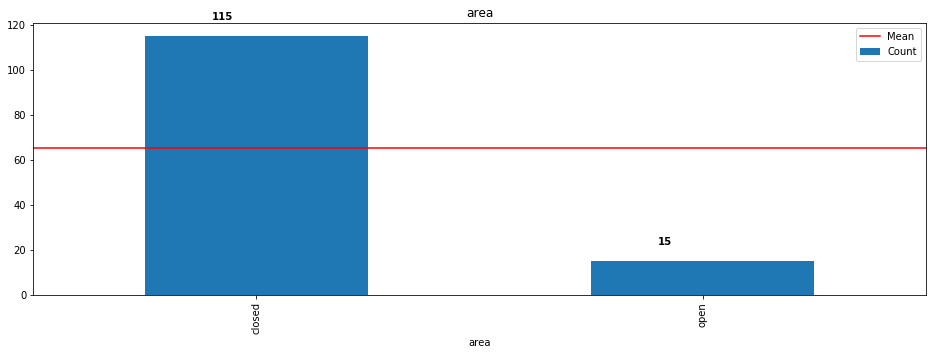

***Restaurant count: 130


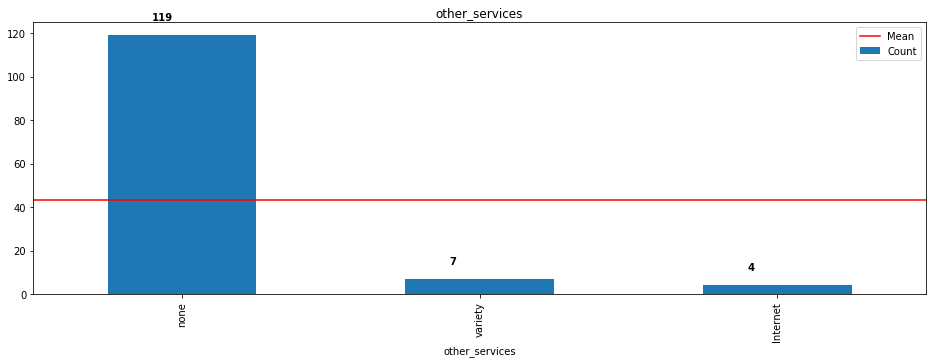

In [19]:
# Cleansing data
resPf['country'] = 'Mexico'     #country
resPf.loc[resPf.city=='San Luis Potosi', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='san luis potosi', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='san luis potosi ', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='san luis potos', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='s.l.p', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='s.l.p.', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='slp.', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='slp', 'city'] = 'SLP'    #city
resPf.loc[resPf.city=='victoria', 'city'] = 'Cd. Victoria'    #city
resPf.loc[resPf.city=='victoria ', 'city'] = 'Cd. Victoria'    #city
resPf.loc[resPf.city=='Ciudad Victoria', 'city'] = 'Cd. Victoria'    #city
resPf.loc[resPf.city=='Cd Victoria', 'city'] = 'Cd. Victoria'    #city
resPf.loc[resPf.city=='cuernavaca', 'city'] = 'Cuernavaca'    #city
resPf.loc[resPf.zip=='?', 'zip'] = 0    #zip
resPf.loc[resPf.zip=='78000S', 'zip'] = 78000    #zip
resPf.loc[resPf.url=='?', 'url'] = 0    #url
resPf.loc[resPf.url!=0, 'url'] = 1
resPf['zip'] = resPf['zip'].astype(int)
resPf['url'] = resPf['url'].astype(int)

resPf.loc[resPf.smoking_area == 'none', 'smoking_area'] = 0
resPf.loc[resPf.smoking_area == 'only at bar', 'smoking_area'] = 1
resPf.loc[resPf.smoking_area == 'permitted', 'smoking_area'] = 1
resPf.loc[resPf.smoking_area == 'section', 'smoking_area'] = 1
resPf.loc[resPf.smoking_area == 'not permitted', 'smoking_area'] = 0
resPf['smoking_area'] = resPf['smoking_area'].astype(int)

resPf.loc[resPf.dress_code == 'informal',  'dress_code'] = 0
resPf.loc[resPf.dress_code == 'casual',  'dress_code'] = 1
resPf.loc[resPf.dress_code == 'formal',  'dress_code'] = 2
resPf['dress_code'] = resPf['dress_code'].astype(int)

resPf.loc[resPf.price == 'low',  'price'] = 0
resPf.loc[resPf.price == 'medium',  'price'] = 1
resPf.loc[resPf.price == 'high',  'price'] = 2
resPf['price'] = resPf['price'].astype(int)

resPf.loc[resPf.Rambience == 'familiar',  'Rambience'] = 1
resPf.loc[resPf.Rambience == 'quiet',  'Rambience'] = 0
resPf['Rambience'] = resPf['Rambience'].astype(int)

resPf.loc[resPf.alcohol == 'No_Alcohol_Served',  'alcohol'] = 0
resPf.loc[resPf.alcohol == 'Wine-Beer',  'alcohol'] = 1
resPf.loc[resPf.alcohol == 'Full_Bar',  'alcohol'] = 2
resPf['alcohol'] = resPf['alcohol'].astype(int)

fieldID = 'placeID'
fields = ['city', 'zip','dress_code','accessibility','price','franchise','area','other_services']
for f in fields:
    df = resPf[[fieldID, f]]
    plotBars(df, f, fieldID) 
    

In [20]:
#Frequency nominal variable
#dummies = ['city','accessibility','franchise','area','other_services']
#for dum in dummies:
#    cad = dum + 'Freq'
#    resPf[cad], profFreqs = getFreqDummies(resPf,'placeID', dum, nrpf)

In [21]:
resPf.info()
resPf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
placeID           130 non-null int64
latitude          130 non-null float64
longitude         130 non-null float64
the_geom_meter    130 non-null object
name              130 non-null object
address           130 non-null object
city              130 non-null object
state             130 non-null object
country           130 non-null object
fax               130 non-null object
zip               130 non-null int64
alcohol           130 non-null int64
smoking_area      130 non-null int64
dress_code        130 non-null int64
accessibility     130 non-null object
price             130 non-null int64
url               130 non-null int64
Rambience         130 non-null int64
franchise         130 non-null object
area              130 non-null object
other_services    130 non-null object
dtypes: float64(2), int64(8), object(11)
memory usage: 21.4+ KB


,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,0,0,0,no_accessibility,1,1,1,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,SLP,s.l.p.,Mexico,?,...,0,0,0,completely,0,0,1,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,SLP,San Luis Potosi,Mexico,?,...,1,1,0,partially,1,0,1,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,Cd. Victoria,tamaulipas,Mexico,?,...,0,0,0,completely,0,0,1,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,Cd. Victoria,Tamaulipas,Mexico,?,...,0,1,0,completely,1,0,1,t,closed,none


## Save clean dataFrame

In [22]:
restaurant = pd.merge(resPay, resKit, on='placeID', how='outer')
#restaurant = pd.merge(restaurant, resSh, on='placeID', how='outer')
restaurant = pd.merge(restaurant, resPk, on='placeID', how='outer')
restaurant = pd.merge(restaurant, resPf, on='placeID', how='outer')
restaurant.rename(columns={'smoking_area': 'smoker', 'alcohol': 'drink_level', 'dress_code': 'dress_preference', 'parking_lot': 'transport', 'Rambience': 'hijos', 'price': 'budget'}, inplace=True)
restaurant.head(5)

,placeID,American_Express,Carte_Blanche,Diners_Club,Discover,Japan_Credit_Bureau,MasterCard-Eurocard,VISA,bank_debit_cards,cash,...,drink_level,smoker,dress_preference,accessibility,budget,url,hijos,franchise,area,other_services
0,132002,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132012,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132019,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132023,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132024,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
placeAux = pd.merge(ratings, restaurant, on='placeID', how='outer')
placeAux = pd.DataFrame(placeAux['placeID'].unique().copy())          #restaurant
placeAux.columns = ['placeID']
placeAux.sort_values(by=['placeID'], inplace=True)
placeAux.index = placeAux['placeID']
placeAux['autonum'] = np.arange(0,len(placeAux))

#--------------------------------Create autonumerate ID columns----------------------------------
restaurant['placeID_auto'] = restaurant['placeID'].apply(lambda x: placeAux.loc[x][1])
restaurant.info()
restaurant.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 42 columns):
placeID                934 non-null int64
American_Express       615 non-null float64
Carte_Blanche          615 non-null float64
Diners_Club            615 non-null float64
Discover               615 non-null float64
Japan_Credit_Bureau    615 non-null float64
MasterCard-Eurocard    615 non-null float64
VISA                   615 non-null float64
bank_debit_cards       615 non-null float64
cash                   615 non-null float64
checks                 615 non-null float64
gift_certificates      615 non-null float64
AFRICA                 769 non-null float64
ASIA                   769 non-null float64
DRINK                  769 non-null float64
EU                     769 non-null float64
LA                     769 non-null float64
NA                     769 non-null float64
ONEKIND                769 non-null float64
OTHER                  769 non-null float64
transport        

,placeID,American_Express,Carte_Blanche,Diners_Club,Discover,Japan_Credit_Bureau,MasterCard-Eurocard,VISA,bank_debit_cards,cash,...,smoker,dress_preference,accessibility,budget,url,hijos,franchise,area,other_services,placeID_auto
0,132002,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,132012,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,132019,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [24]:
restaurant.to_csv('restaurantClean.csv', encoding='utf-8', index=False)